In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(_ , _), (x_train, _) = mnist.load_data()
x = x_train.astype('float32') / 255.


Using TensorFlow backend.


In [3]:
x = x.reshape((len(x), np.prod(x.shape[1:])))
x_test = np.copy(x[:100])

In [4]:
col_miss = 0.3
col_size = int(x_test.shape[1] *col_miss )

colidx = np.random.choice(range(x_test.shape[1]), size=(10,col_size), replace=True)
x_test[np.arange(10)[:,None],colidx] = float('nan')

In [5]:
from missingpy import KNNImputer
imputer = KNNImputer(n_neighbors=10, weights="uniform", row_max_missing=0.8)
X_impute = imputer.fit_transform(x_test)


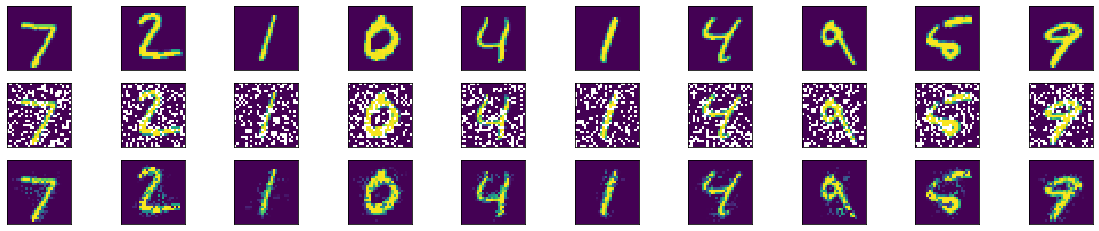

In [6]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
 
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x[:100][i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display corrupted
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(X_impute[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
fig.savefig('KNN_mnist.png')
